Class counts (overall):
1    700
0    300
Name: count, dtype: int64

Class %:
1    70.0
0    30.0
Name: proportion, dtype: float64


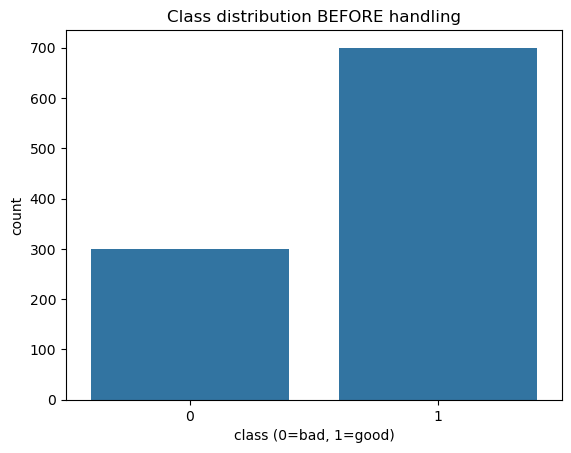


Train counts BEFORE SMOTE:
1    560
0    240
Name: count, dtype: int64

Train counts AFTER SMOTE:
1    560
0    560
Name: count, dtype: int64


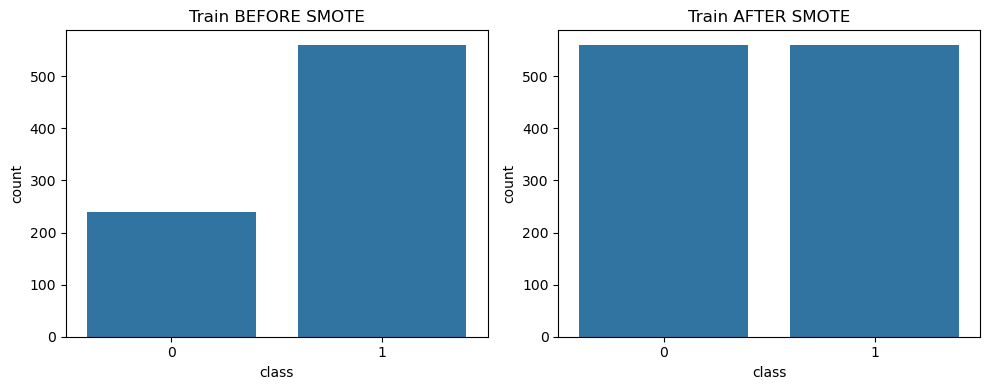

In [2]:
# 04_imbalance_handling.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# 1) Load data
df = pd.read_csv("../data/credit_customers (1).csv")

# 2) Encode target (good=1, bad=0) with LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df["class"])   # now y is 0/1
X = df.drop(columns=["class"])      # features only

# 3) Encode features (One-Hot)
X = pd.get_dummies(X, drop_first=True)

# 4) Check imbalance BEFORE
print("Class counts (overall):")
print(pd.Series(y).value_counts())
print("\nClass %:")
print((pd.Series(y).value_counts(normalize=True) * 100).round(2))

sns.countplot(x=y)
plt.title("Class distribution BEFORE handling")
plt.xlabel("class (0=bad, 1=good)")
plt.ylabel("count")
plt.show()

# 5) Split first (use stratify to keep same ratio in test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 6) Apply SMOTE on TRAIN only
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 7) Check results
print("\nTrain counts BEFORE SMOTE:")
print(pd.Series(y_train).value_counts())
print("\nTrain counts AFTER SMOTE:")
print(pd.Series(y_train_res).value_counts())

# 8) Plot before vs after
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.countplot(x=y_train, ax=axes[0])
axes[0].set_title("Train BEFORE SMOTE")
axes[0].set_xlabel("class"); axes[0].set_ylabel("count")

sns.countplot(x=y_train_res, ax=axes[1])
axes[1].set_title("Train AFTER SMOTE")
axes[1].set_xlabel("class"); axes[1].set_ylabel("count")

plt.tight_layout()
plt.show()

